In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import figurefirst as fifi
import time
import matplotlib.ticker

In [ ]:
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        if self._useMathText:
            self.format = r'$\mathdefault{%s}$' % self.format

# Read in hdf datasets 

In [2]:
df1=pd.read_hdf('small_10.20.20_maskedgpsdata.hdf')
df2=pd.read_hdf('small_7.7.21_maskedgpsdata.hdf')
df3=pd.read_hdf('small_9.26.21_maskedgpsdata.hdf')
df4=pd.read_hdf('small_10.29.21_maskedgpsdata.hdf')
df5=pd.read_hdf('small_10.30.21_maskedgpsdata.hdf')
df6=pd.read_hdf('small_1.8.22_maskedgpsdata.hdf')
df7=pd.read_hdf('small_1.11.22_maskedgpsdata.hdf')
df8=pd.read_hdf('small_1.15.22_maskedgpsdata.hdf')
df9=pd.read_hdf('small_4.30.22_maskedgpsdata.hdf')
df10=pd.read_hdf('small_5.1.22_maskedgpsdata.hdf')
df11=pd.read_hdf('small_5.2.22_maskedgpsdata.hdf')
df12=pd.read_hdf('small_6.1.22_maskedgpsdata.hdf')
df13=pd.read_hdf('small_6.3.22_maskedgpsdata.hdf')
df14=pd.read_hdf('small_6.7.22_maskedgpsdata.hdf')
df15=pd.read_hdf('small_6.8.22_maskedgpsdata.hdf')
df16=pd.read_hdf('small_6.22.22_maskedgpsdata.hdf')

In [3]:
df=df8
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(df.time.iloc[0]))

'2022-01-15 11:48:13'

In [4]:
print(df.keys())

Index(['time', 'S2_1', 'D_1', 'X_1', 'Y_1', 'Z_1', 'S2_2', 'D_2', 'X_2', 'Y_2',
       'Z_2', 'S2_3', 'D_3', 'X_3', 'Y_3', 'Z_3', 'S2_4', 'D_4', 'X_4', 'Y_4',
       'Z_4', 'S2_5', 'D_5', 'X_5', 'Y_5', 'Z_5', 'S2_6', 'D_6', 'X_6', 'Y_6',
       'Z_6', 'S2_7', 'D_7', 'X_7', 'Y_7', 'Z_7', 'S2_8_verticallyorientated',
       'D_8_verticallyorientated', 'X_8_verticallyorientated',
       'Y_8_verticallyorientated', 'Z_8_verticallyorientated',
       'S2_9_verticallyorientated', 'D_9_verticallyorientated',
       'X_9_verticallyorientated', 'Y_9_verticallyorientated',
       'Z_9_verticallyorientated', 'U_8_verticallyorientated',
       'V_8_verticallyorientated', 'U_9_verticallyorientated',
       'V_9_verticallyorientated'],
      dtype='object')


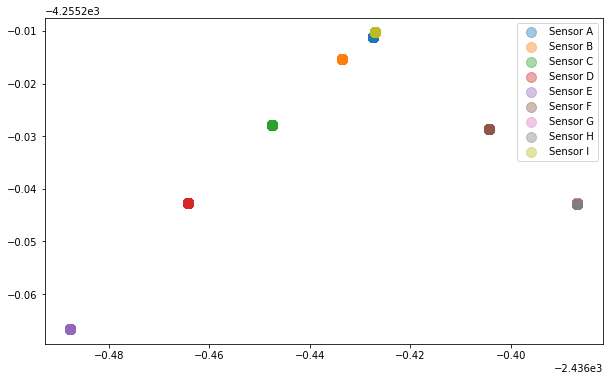

In [5]:
#get a sense of where sensors were located
#vertically oriented sensors were paired on a tripod with another sensor
#using this to determine which sensor to use for horizontal speed comparison

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.X_1,df.Y_1, s=100, alpha=.4, label='Sensor A')
ax.scatter(df.X_2,df.Y_2, s=100, alpha=.4, label='Sensor B')
ax.scatter(df.X_3,df.Y_3, s=100, alpha=.4, label='Sensor C')
ax.scatter(df.X_4,df.Y_4, s=100, alpha=.4, label='Sensor D')
ax.scatter(df.X_5,df.Y_5, s=100, alpha=.4, label='Sensor E')
ax.scatter(df.X_6,df.Y_6, s=100, alpha=.4, label='Sensor F')
ax.scatter(df.X_7,df.Y_7, s=100, alpha=.4, label='Sensor G')
ax.scatter(df.X_8_verticallyorientated,df.Y_8_verticallyorientated, s=100, alpha=.4, label='Sensor H')
ax.scatter(df.X_9_verticallyorientated,df.Y_9_verticallyorientated, s=100, alpha=.4, label='Sensor I')
ax.legend()

## Separating by environment to make plotting easier

In [18]:
alldfs=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16]
dates=['10/20/20', '7/7/21', '9/26/21', '10/29/21', '10/30/21', '1/8/22', '1/11/22', '1/15/22', '4/30/22', '5/1/22', '5/2/22', '6/1/22', '6/3/22', '6/7/22', '6/8/22','6/22/22']
desert=0,6,7,11,12
forest=1,3,13,14,15
urban=2,4,5,8,9,10

In [19]:
desert_dates=['10/20/20', '1/11/22', '1/15/22', '6/1/22', '6/3/22']
forest_dates=['7/7/21', '10/29/21', '6/7/22', '6/8/22', '6/22/22']
urban_dates=['9/26/21', '10/30/21', '1/8/22', '4/30/22', '5/1/22', '5/2/22']

In [20]:
placeholder=np.zeros(len(df1)) # for df with no vertical vel (desert 10/20/20)

In [21]:
desert_s2=([df1.S2_1, df7.S2_1,df8.S2_1,df12.S2_8,df13.S2_8])
desert_d=([df1.D_1, df7.D_1,df8.D_1,df12.D_8,df13.D_8])
desert_vert=([placeholder, df7.U_9_verticallyorientated, df8.U_9_verticallyorientated,df12.U_9_verticallyorientated,df13.U_9_verticallyorientated])

forest_s2=([df2.S2_5,df4.S2_1,df14.S2_8,df15.S2_8,df16.S2_8])
forest_d=([df2.D_5,df4.D_1,df14.D_8,df15.D_8,df16.D_8])
forest_vert=([df2.U_7_verticallyorientated,df4.U_9_verticallyorientated,df14.U_9_verticallyorientated,df15.U_9_verticallyorientated,df16.U_9_verticallyorientated])

urban_s2=([df3.S2_6,df5.S2_1,df6.S2_7,df9.S2_8,df10.S2_8,df11.S2_8])
urban_d=([df3.D_6,df5.D_1,df6.D_7,df9.D_8,df10.D_8,df11.D_8])
urban_vert=([df3.U_8_verticallyorientated,df5.U_9_verticallyorientated,df6.U_8_verticallyorientated,df9.U_9_verticallyorientated,df10.U_9_verticallyorientated,df11.U_9_verticallyorientated])

In [94]:
all_s2=([df1.S2_1,df2.S2_5,df3.S2_6,df4.S2_1,df5.S2_1,df6.S2_7, df7.S2_1,df8.S2_1,df9.S2_8,df10.S2_8,df11.S2_8, df12.S2_8,df13.S2_8, df14.S2_8,df15.S2_8,df16.S2_8])
all_d=([df1.D_1,df2.D_5,df3.D_6,df4.D_1,df5.D_1,df6.D_7, df7.D_1,df8.D_1,df9.D_8,df10.D_8,df11.D_8, df12.D_8,df13.D_8, df14.D_8,df15.D_8,df16.D_8])
all_vert=([placeholder,df2.U_7_verticallyorientated,df3.U_8_verticallyorientated,df4.U_9_verticallyorientated,df5.U_9_verticallyorientated,df6.U_8_verticallyorientated, df7.U_9_verticallyorientated, df8.U_9_verticallyorientated,df9.U_9_verticallyorientated,df10.U_9_verticallyorientated,df11.U_9_verticallyorientated,df12.U_9_verticallyorientated,df13.U_9_verticallyorientated, df14.U_9_verticallyorientated,df15.U_9_verticallyorientated,df16.U_9_verticallyorientated])



# Plots for S2, D and vertical velocity

### Desert/Valley

In [23]:
mpl.rcParams.update({'font.size': 12})

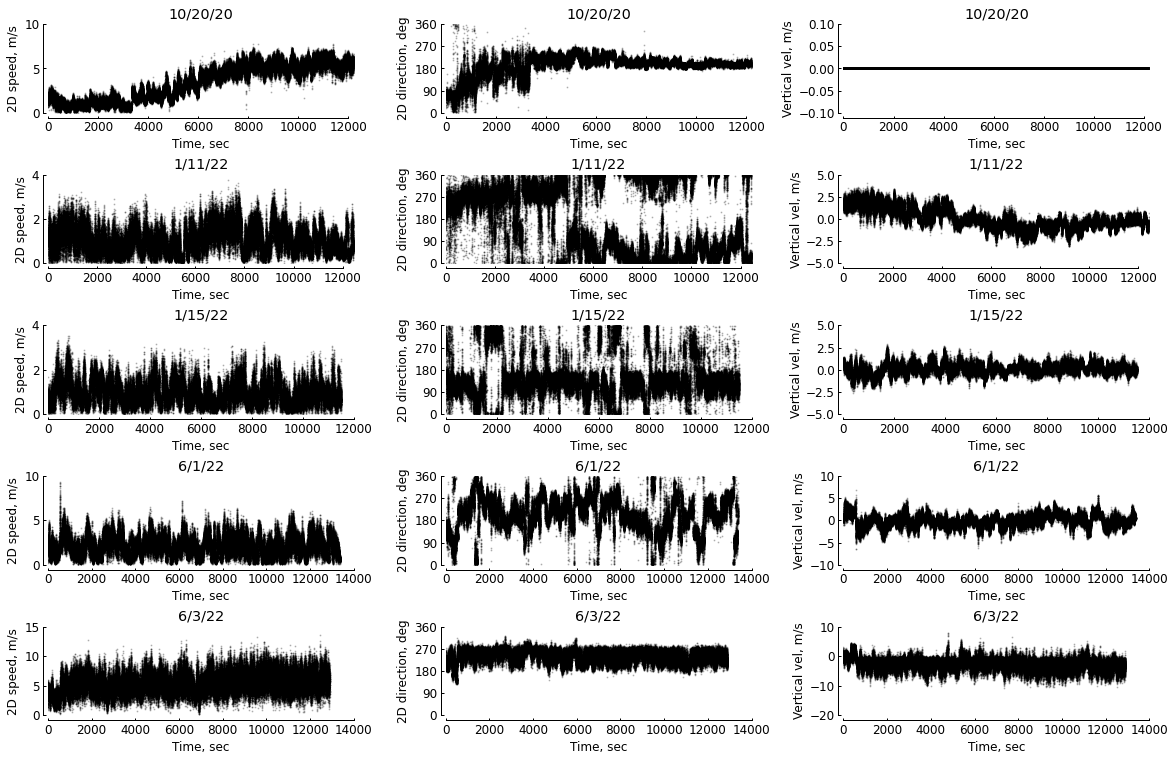

In [51]:
fig, ax = plt.subplots(nrows=len(desert_s2), ncols=3, rasterized=True, figsize=(18,12))
fig.subplots_adjust(left=0.05,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.7)
for i in range(0,len(desert_s2)):
    time=np.linspace(0,len(desert_s2[i])/10,len(desert_s2[i])) #convert df time to seconds 
    ax[i,0].scatter(time, desert_s2[i],s=1, alpha=.2, color='k', label=desert_dates[i])
    ax[i,1].scatter(time, desert_d[i],s=1, alpha=.2, color='k', label=desert_dates[i])
    ax[i,2].scatter(time, desert_vert[i],s=1, alpha=.2, color='k', label=desert_dates[i])

    ax[i,0].set_xlim(0,np.max(time))
    ax[i,1].set_xlim(0,np.max(time))
    ax[i,2].set_xlim(0,np.max(time))
    
    ax[i,0].set_ylim(0,np.max(desert_s2[i]))
    ax[i,1].set_ylim(0,360)
    #ax[i,2].set_ylim(0,np.max(time))
    
    ax[i,0].set_ylabel('2D speed, m/s')
    ax[i,1].set_ylabel('2D direction, deg')
    ax[i,2].set_ylabel('Vertical vel, m/s')
    
    ax[i,0].set_xlabel('Time, sec')
    ax[i,1].set_xlabel('Time, sec')
    ax[i,2].set_xlabel('Time, sec')
    
    
    ax[i,0].set_title(desert_dates[i])
    ax[i,1].set_title(desert_dates[i])
    ax[i,2].set_title(desert_dates[i])
    

    fifi.mpl_functions.adjust_spines(ax[i,0], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
    fifi.mpl_functions.adjust_spines(ax[i,1], ['left', 'bottom'],
                                 yticks=np.arange(0,400,90),  
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
    fifi.mpl_functions.adjust_spines(ax[i,2], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
    
fig.savefig('desertsignals.svg', dpi=600, format='svg')

### Forest

<ipython-input-95-d081234c728c>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,1].set_yticklabels(yticklabels)


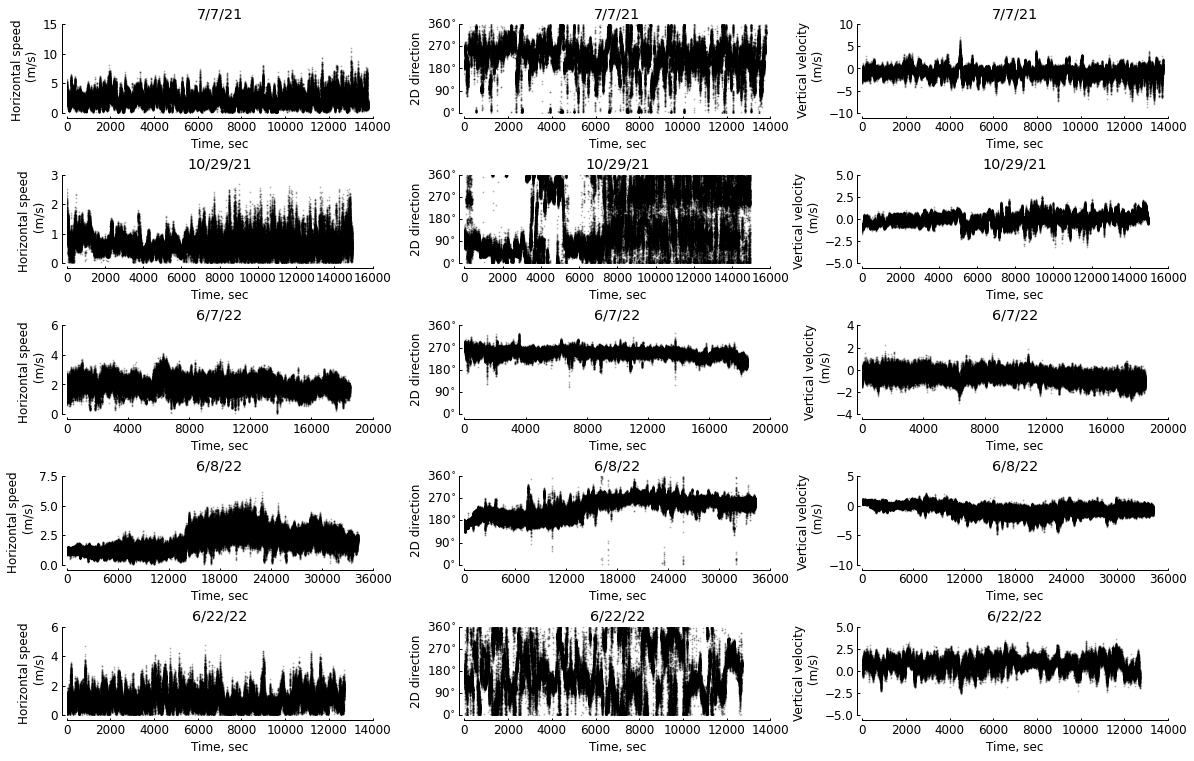

In [95]:
fig, ax = plt.subplots(nrows=len(forest_s2), ncols=3, rasterized=True, figsize=(18,12))

fig.subplots_adjust(left=0.05,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.7)

for i in range(0,len(forest_s2)):
    time=np.linspace(0,len(forest_s2[i])/10,len(forest_s2[i])) #convert df time to seconds 
    ax[i,0].scatter(time, forest_s2[i],s=1, alpha=.2, color='k', label=forest_dates[i])
    ax[i,1].scatter(time, forest_d[i],s=1, alpha=.2, color='k', label=forest_dates[i])
    ax[i,2].scatter(time, forest_vert[i],s=1, alpha=.2, color='k', label=forest_dates[i])

    ax[i,0].set_xlim(0,np.max(time))
    ax[i,1].set_xlim(0,np.max(time))
    ax[i,2].set_xlim(0,np.max(time))
    
    ax[i,0].set_ylim(0,np.max(forest_s2[i]))
    ax[i,1].set_ylim(0,360)
    #ax[i,2].set_ylim(0,np.max(time))
    
    ax[i,0].set_ylabel('Horizontal speed \n (m/s)')
    ax[i,1].set_ylabel('2D direction')
    ax[i,2].set_ylabel('Vertical velocity \n (m/s)')
    
    ax[i,0].set_xlabel('Time, sec')
    ax[i,1].set_xlabel('Time, sec')
    ax[i,2].set_xlabel('Time, sec')
    
    
    ax[i,0].set_title(forest_dates[i])
    ax[i,1].set_title(forest_dates[i])
    ax[i,2].set_title(forest_dates[i])
    
    evenyticks=np.arange(0, 360+10, 90)
    yticklabels=[['$' + str(y) + '^{\circ}$' + '',] for y in evenyticks]
    yticklabels=np.ravel(yticklabels)
    ax[i,1].set_yticklabels(yticklabels)


    
    if ((np.round(np.max(time), -3))==18000):
            fifi.mpl_functions.adjust_spines(ax[i,0], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+4000, 4000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
            fifi.mpl_functions.adjust_spines(ax[i,1], ['left', 'bottom'],
                                 yticks=np.arange(0,400,90),  
                                 xticks=np.arange(0,np.round(np.max(time), -3)+4000, 4000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
            fifi.mpl_functions.adjust_spines(ax[i,2], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+4000, 4000),
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)


    elif (np.round(np.max(time), -3)>18000):
            fifi.mpl_functions.adjust_spines(ax[i,0], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+5000, 6000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
            fifi.mpl_functions.adjust_spines(ax[i,1], ['left', 'bottom'],
                                 yticks=np.arange(0,400,90),  
                                 xticks=np.arange(0,np.round(np.max(time), -3)+5000, 6000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
            fifi.mpl_functions.adjust_spines(ax[i,2], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+5000, 6000),
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)

        
    else:        
        fifi.mpl_functions.adjust_spines(ax[i,0], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
        fifi.mpl_functions.adjust_spines(ax[i,1], ['left', 'bottom'],
                                 yticks=np.arange(0,400,90),  
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
        fifi.mpl_functions.adjust_spines(ax[i,2], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)

    
#fig.savefig('forestsignals.svg', dpi=600, format='svg')

### Urban

21000.0
19000.0
17000.0
20000.0
38000.0
17000.0


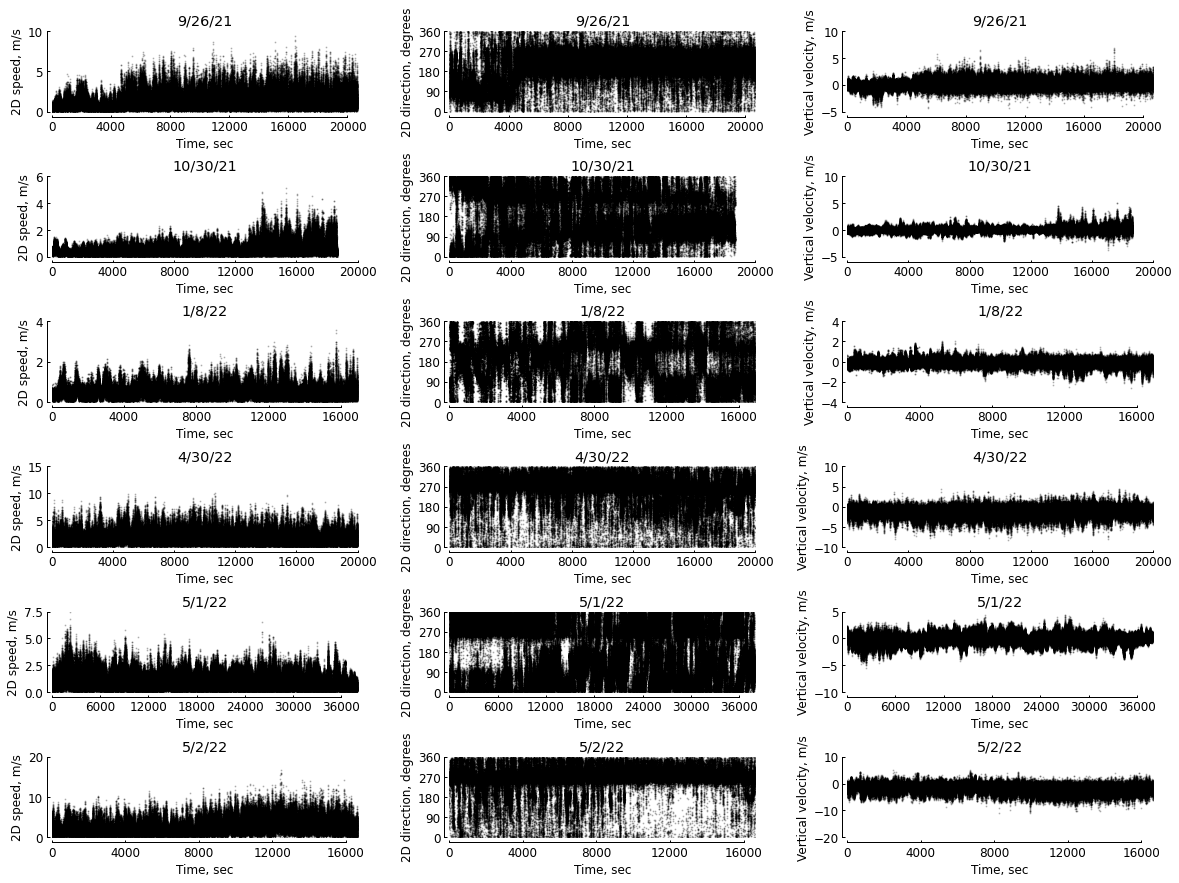

In [87]:
fig, ax = plt.subplots(nrows=len(urban_s2), ncols=3, rasterized=True, figsize=(18,14))

fig.subplots_adjust(left=0.05,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.8)


for i in range(0,len(all_s2)):
    time=np.linspace(0,len(urban_s2[i])/10,len(urban_s2[i])) #convert df time to seconds 
    ax[i,0].scatter(time, urban_s2[i],s=1, alpha=.2, color='k', label=urban_dates[i])
    ax[i,1].scatter(time, urban_d[i],s=1, alpha=.2, color='k', label=urban_dates[i])
    ax[i,2].scatter(time, urban_vert[i],s=1, alpha=.2, color='k', label=urban_dates[i])

    ax[i,0].set_xlim(0,np.max(time))
    ax[i,1].set_xlim(0,np.max(time))
    ax[i,2].set_xlim(0,np.max(time))
    
    ax[i,0].set_ylim(0,np.max(urban_s2[i]))
    ax[i,1].set_ylim(0,360)
    #ax[i,2].set_ylim(0,np.max(time))
    
    ax[i,0].set_ylabel('2D speed, m/s')
    ax[i,1].set_ylabel('2D direction, degrees')
    ax[i,2].set_ylabel('Vertical velocity, m/s')
    
    ax[i,0].set_xlabel('Time, sec')
    ax[i,1].set_xlabel('Time, sec')
    ax[i,2].set_xlabel('Time, sec')
    
    
    ax[i,0].set_title(urban_dates[i])
    ax[i,1].set_title(urban_dates[i])
    ax[i,2].set_title(urban_dates[i])
    
    if (np.round(np.max(time), -3)==38000):
            fifi.mpl_functions.adjust_spines(ax[i,0], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+4000, 6000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
            fifi.mpl_functions.adjust_spines(ax[i,1], ['left', 'bottom'],
                                 yticks=np.arange(0,400,90),  
                                 xticks=np.arange(0,np.round(np.max(time), -3)+4000, 6000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
            fifi.mpl_functions.adjust_spines(ax[i,2], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+4000, 6000),
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)


    
    elif ((np.round(np.max(time), -3))>=17000):
            fifi.mpl_functions.adjust_spines(ax[i,0], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+3000, 4000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
            fifi.mpl_functions.adjust_spines(ax[i,1], ['left', 'bottom'],
                                 yticks=np.arange(0,400,90),  
                                 xticks=np.arange(0,np.round(np.max(time), -3)+3000, 4000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
            fifi.mpl_functions.adjust_spines(ax[i,2], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+3000, 4000),
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
        
    else:        
        fifi.mpl_functions.adjust_spines(ax[i,0], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
        fifi.mpl_functions.adjust_spines(ax[i,1], ['left', 'bottom'],
                                 yticks=np.arange(0,400,90),  
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)
        fifi.mpl_functions.adjust_spines(ax[i,2], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),
                                 tick_length=2.5,
                                 spine_locations={'left': 5, 'bottom': 5},
                                 linewidth=1)

    
    print(np.round(np.max(time), -3))
fig.savefig('urbansignals.svg', dpi=600, format='svg')

## All

In [122]:
mpl.rcParams.update({'font.size': 6})

<ipython-input-138-6916aebf7b51>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,1].set_yticklabels(yticklabels)


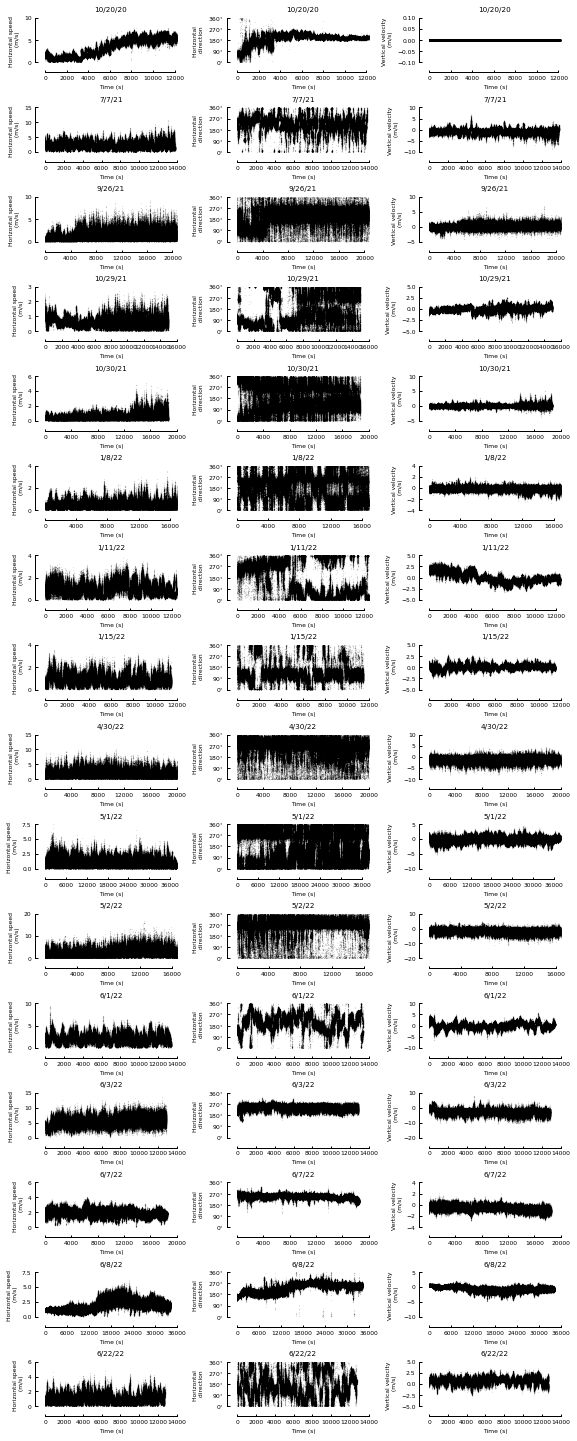

In [138]:
fig, ax = plt.subplots(nrows=len(all_s2), ncols=3, rasterized=True, layout='tight', figsize=(8,20))

fig.subplots_adjust(left=0.05,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.85)

for i in range(0,len(all_s2)):
    time=np.linspace(0,len(all_s2[i])/10,len(all_s2[i])) #convert df time to seconds 
    ax[i,0].scatter(time, all_s2[i],s=.006, alpha=.6, color='k', label=dates[i])
    ax[i,1].scatter(time, all_d[i],s=.006, alpha=.6, color='k', label=dates[i])
    ax[i,2].scatter(time, all_vert[i],s=.006, alpha=.6, color='k', label=dates[i])

    ax[i,0].set_xlim(0,np.max(time))
    ax[i,1].set_xlim(0,np.max(time))
    ax[i,2].set_xlim(0,np.max(time))
    
    ax[i,0].set_ylim(0,np.max(all_s2[i]))
    ax[i,1].set_ylim(0,360)
    #ax[i,2].set_ylim(0,np.max(time))
    
    ax[i,0].set_ylabel('Horizontal speed \n (m/s)')
    ax[i,1].set_ylabel('Horizontal \n direction')
    ax[i,2].set_ylabel('Vertical velocity \n (m/s)')
    
    ax[i,0].set_xlabel('Time (s)')
    ax[i,1].set_xlabel('Time (s)')
    ax[i,2].set_xlabel('Time (s)')
    
    
    ax[i,0].set_title(dates[i])
    ax[i,1].set_title(dates[i])
    ax[i,2].set_title(dates[i])
    
    evenyticks=np.arange(0, 360+10, 90)
    yticklabels=[['$' + str(y) + '^{\circ}$' + '',] for y in evenyticks]
    yticklabels=np.ravel(yticklabels)
    ax[i,1].set_yticklabels(yticklabels)

    if (np.round(np.max(time), -3)>=34000):
            fifi.mpl_functions.adjust_spines(ax[i,0], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+3000, 6000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
            fifi.mpl_functions.adjust_spines(ax[i,1], ['left', 'bottom'],
                                 yticks=np.arange(0,400,90),  
                                 xticks=np.arange(0,np.round(np.max(time), -3)+3000, 6000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
            fifi.mpl_functions.adjust_spines(ax[i,2], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+3000, 6000),
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
    elif ((np.round(np.max(time), -3))>=17000):
            fifi.mpl_functions.adjust_spines(ax[i,0], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+3000, 4000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
            fifi.mpl_functions.adjust_spines(ax[i,1], ['left', 'bottom'],
                                 yticks=np.arange(0,400,90),  
                                 xticks=np.arange(0,np.round(np.max(time), -3)+3000, 4000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
            fifi.mpl_functions.adjust_spines(ax[i,2], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+3000, 4000),
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
            
  
    else:        
        fifi.mpl_functions.adjust_spines(ax[i,0], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
        fifi.mpl_functions.adjust_spines(ax[i,1], ['left', 'bottom'],
                                 yticks=np.arange(0,400,90),  
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
        fifi.mpl_functions.adjust_spines(ax[i,2], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)

    #print(np.round(np.max(time), -3))
fig.savefig('allsignals.pdf', dpi=600, format='pdf')

<ipython-input-164-49ef26f7aadf>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i,1].set_yticklabels(yticklabels)


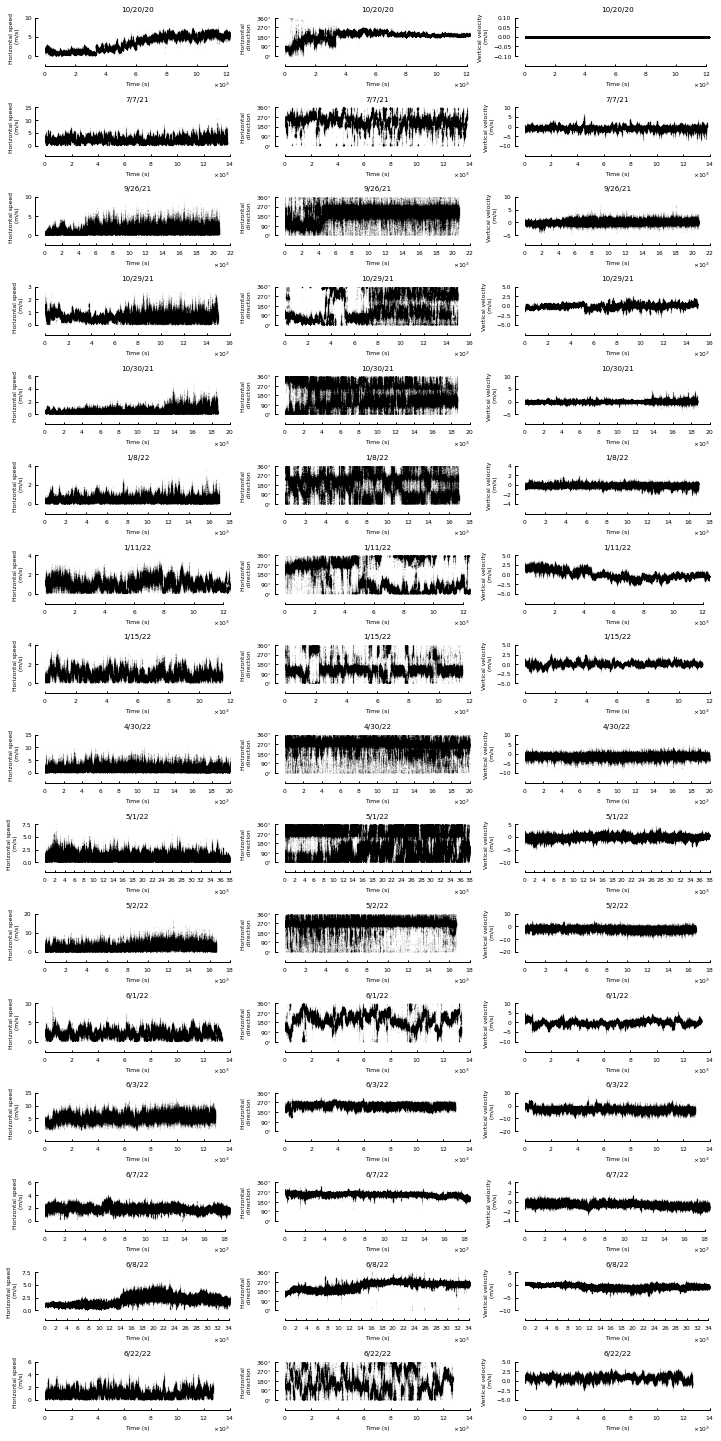

In [164]:
fig, ax = plt.subplots(nrows=len(all_s2), ncols=3, rasterized=True, layout='tight', figsize=(10,20))

fig.subplots_adjust(left=0.05,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.85)

for i in range(0,len(all_s2)):
    time=np.linspace(0,len(all_s2[i])/10,len(all_s2[i])) #convert df time to seconds 
    ax[i,0].scatter(time, all_s2[i],s=.001, alpha=.7, color='k', label=dates[i])
    ax[i,1].scatter(time, all_d[i],s=.001, alpha=.7, color='k', label=dates[i])
    ax[i,2].scatter(time, all_vert[i],s=.001, alpha=.7, color='k', label=dates[i])

    ax[i,0].set_xlim(0,np.max(time))
    ax[i,1].set_xlim(0,np.max(time))
    ax[i,2].set_xlim(0,np.max(time))
    
    ax[i,0].set_ylim(0,np.max(all_s2[i]))
    ax[i,1].set_ylim(0,360)
    #ax[i,2].set_ylim(0,np.max(time))
    
    ax[i,0].set_ylabel('Horizontal speed \n (m/s)')
    ax[i,1].set_ylabel('Horizontal \n direction')
    ax[i,2].set_ylabel('Vertical velocity \n (m/s)')
    
    ax[i,0].set_xlabel('Time (s)')
    ax[i,1].set_xlabel('Time (s)')
    ax[i,2].set_xlabel('Time (s)')
    
    
    ax[i,0].set_title(dates[i])
    ax[i,1].set_title(dates[i])
    ax[i,2].set_title(dates[i])
    
    evenyticks=np.arange(0, 360+10, 90)
    yticklabels=[['$' + str(y) + '^{\circ}$' + '',] for y in evenyticks]
    yticklabels=np.ravel(yticklabels)
    ax[i,1].set_yticklabels(yticklabels)
    
    fifi.mpl_functions.adjust_spines(ax[i,0], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
    fifi.mpl_functions.adjust_spines(ax[i,1], ['left', 'bottom'],
                                 yticks=np.arange(0,400,90),  
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
    fifi.mpl_functions.adjust_spines(ax[i,2], ['left', 'bottom'],
                                 xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
    ax[i,0].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
    ax[i,1].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
    ax[i,2].ticklabel_format(style='sci', axis='x', scilimits=(0,0), useMathText=True)
    
    ax[i,0].xaxis.set_major_formatter(OOMFormatter(3, "%1.f"))
    ax[i,1].xaxis.set_major_formatter(OOMFormatter(3, "%1.f"))
    ax[i,2].xaxis.set_major_formatter(OOMFormatter(3, "%1.f"))
    #print(np.round(np.max(time), -3))
fig.savefig('allsignals1.svg', dpi=600, format='svg')

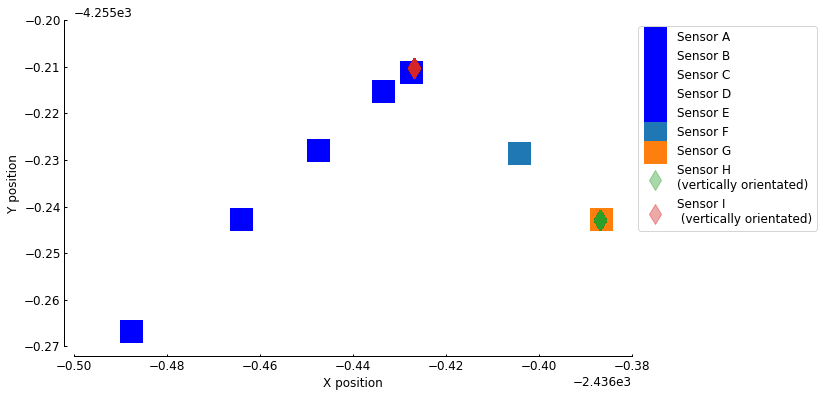

In [100]:
#making nicer sensor orientation plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.X_1,df.Y_1, s=500, marker="s", color='blue', label='Sensor A')
ax.scatter(df.X_2,df.Y_2, s=500, marker="s",  color='blue', label='Sensor B')
ax.scatter(df.X_3,df.Y_3, s=500, marker="s", color='blue', label='Sensor C')
ax.scatter(df.X_4,df.Y_4, s=500, marker="s", color='blue',label='Sensor D')
ax.scatter(df.X_5,df.Y_5, s=500, marker="s", color='blue', label='Sensor E')
ax.scatter(df.X_6,df.Y_6, s=500,marker= "s", label='Sensor F')
ax.scatter(df.X_7,df.Y_7, s=500,marker= "s", label='Sensor G')
ax.scatter(df.X_8_verticallyorientated,df.Y_8_verticallyorientated, s=200,marker= "d", alpha=.4, label='Sensor H \n(vertically orientated)')
ax.scatter(df.X_9_verticallyorientated,df.Y_9_verticallyorientated, s=200,marker= "d", alpha=.4, label='Sensor I \n (vertically orientated)')

ax.set_xlabel('X position')
ax.set_ylabel('Y position')


fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],
                                 #xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),    
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)

ax.legend(bbox_to_anchor=(1,1))

In [11]:
mpl.rcParams.update({'font.size': 16})

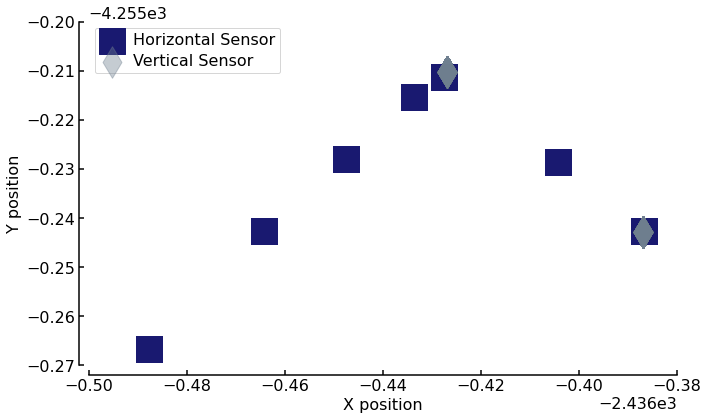

In [105]:
#making nicer sensor orientation plot
fig, ax = plt.subplots(figsize=(10,6), layout='tight')
ax.scatter(df.X_1,df.Y_1, s=700, marker="s", color='midnightblue', label='Horizontal Sensor')
ax.scatter(df.X_2,df.Y_2, s=700, marker="s",  color='midnightblue')
ax.scatter(df.X_3,df.Y_3, s=700, marker="s", color='midnightblue')
ax.scatter(df.X_4,df.Y_4, s=700, marker="s", color='midnightblue')
ax.scatter(df.X_5,df.Y_5, s=700, marker="s", color='midnightblue')
ax.scatter(df.X_6,df.Y_6, s=700,marker= "s", color='midnightblue')
ax.scatter(df.X_7,df.Y_7, s=700,marker= "s", color='midnightblue')
ax.scatter(df.X_8_verticallyorientated,df.Y_8_verticallyorientated, s=500, color='slategray',marker= "d", alpha=.4, label='Vertical Sensor')
ax.scatter(df.X_9_verticallyorientated,df.Y_9_verticallyorientated, s=500,color='slategray', marker= "d", alpha=.4)

ax.set_xlabel('X position')
ax.set_ylabel('Y position')

ax.legend(loc='upper left')

fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],
                                 #xticks=np.arange(0,np.round(np.max(time), -3)+2000, 2000),    
                                 tick_length=5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1.5)

# set fontsize
fifi.mpl_functions.set_fontsize(ax, 16)
fig.savefig('sensororientations.svg', dpi=600, format='svg')

In [24]:
for i in range(1,5):
    print('ratio of vertical speed to horizontal speed,',desert_dates[i],':', np.mean(np.abs(desert_vert[i]))/np.mean(desert_s2[i]) * 100)

ratio of vertical speed to horizontal speed, 1/11/22 : 81.83341975179663
ratio of vertical speed to horizontal speed, 1/15/22 : 47.6068490645417
ratio of vertical speed to horizontal speed, 6/1/22 : 44.97892837376774
ratio of vertical speed to horizontal speed, 6/3/22 : 51.012962700305344


In [25]:
for i in range(0,5):
    print('ratio of vertical speed to horizontal speed,',forest_dates[i],':', np.mean(np.abs(forest_vert[i]))/np.mean(forest_s2[i]) * 100)

ratio of vertical speed to horizontal speed, 7/7/21 : 45.813361484563195
ratio of vertical speed to horizontal speed, 10/29/21 : 66.81331862495959
ratio of vertical speed to horizontal speed, 6/7/22 : 32.64474467797598
ratio of vertical speed to horizontal speed, 6/8/22 : 39.26334378563617
ratio of vertical speed to horizontal speed, 6/22/22 : 80.74100512810102


In [26]:
for i in range(0,6):
    print('ratio of vertical speed to horizontal speed,',urban_dates[i],':', np.mean(np.abs(urban_vert[i]))/np.mean(urban_s2[i]) * 100)

ratio of vertical speed to horizontal speed, 9/26/21 : 44.6146367744042
ratio of vertical speed to horizontal speed, 10/30/21 : 56.993641616258415
ratio of vertical speed to horizontal speed, 1/8/22 : 58.06990660683928
ratio of vertical speed to horizontal speed, 4/30/22 : 75.31539741343035
ratio of vertical speed to horizontal speed, 5/1/22 : 63.323589441623994
ratio of vertical speed to horizontal speed, 5/2/22 : 72.06926556408591
